# 今日任务：数据分类 I


sklearn 中的 make_circles 方法生成训练样本，并随机生成测试样本，用 KNN 分类并可视化。


In [45]:
# 导入 sklearn 第三方库
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

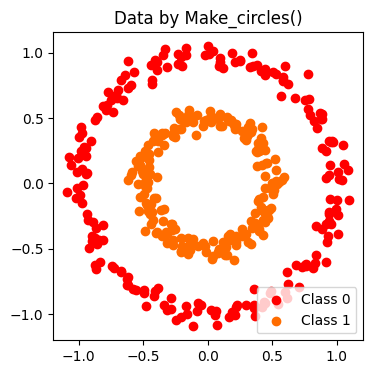

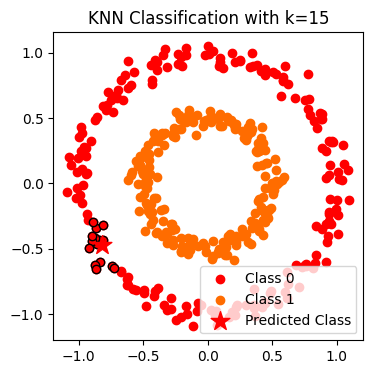

In [70]:

k = 15
cmap = plt.cm.get_cmap('hsv', k)

# 生成 circles 数据
train_data, train_target = make_circles(n_samples=400, noise=0.1, factor=0.2)

# 绘制 circles 数据
plt.figure(figsize=(4, 4))
for i in range(2):  # 2 是 make_circles 中生成的 2 个圆
    plt.scatter(train_data[train_target == i, 0], train_data[train_target == i, 1], color=cmap(i), label=f"Class {i}")
plt.title("Data by Make_circles()")
plt.legend(loc='lower right')
plt.show()

# 随机生成一个测试样本，范围 -1 ~ 1
test = np.random.rand(1, 2) * 2 - 1

# 预测测试样本的标签
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_data, train_target)
pred = knn.predict(test)            # 预测测试样本的标签
dist, ind = knn.kneighbors(test)    # 找到 k 个最近邻居

# 绘制测试样本，保留上一个绘制的 circles 数据的颜色
plt.figure(figsize=(4, 4))
for i in range(2):
    plt.scatter(train_data[train_target == i, 0], train_data[train_target == i, 1], color=cmap(i), label=f"Class {i}")
for i in range(k):      # 绘制 k 个最近邻居
    plt.scatter(train_data[ind[0][i], 0], train_data[ind[0][i], 1], color=cmap(pred[0]), edgecolor='black')
# 给星星也画上颜色描边
plt.scatter(test[0, 0], test[0, 1], color=cmap(pred[0]), marker='*', s=200, edgecolor='black', linewidth=1.5, label=f"Predicted Class")
plt.title(f"KNN Classification with k={k}")
plt.legend(loc='lower right')
plt.show()
